# REDES NEURONALES 2025  
**Trabajo Práctico 1: El modelo de neuronas de Izhikevich**

---

## Importante

**a)** Entreguen el práctico enviando un email a las cuentas:  
- francisco.tamarit@unc.edu.ar  
- juan.perotti@unc.edu.ar  
- tristan.osan@unc.edu.ar  

Y a las cuentas de email de sus compañeros. Todos los profes y todos los compañeros de trabajo deben recibir el email de entrega.  
**Subject del email:** `Redes Neuronales 2025 - entrega TP1`

---
### El modelo de neuronas de Izhikevich

El modelo de Izhikevich (ver refs. [1, 2]) es una simplificación del conocido modelo que Hodgkin y Huxley introdujeron en 1952 (ver ref. [3]) para describir el comportamiento del potencial de disparo de una neurona.
El modelo se describe mediante el siguiente sistema de EDOs bidimensionales de primer orden:
$$
v̇(t)
 =
 g2v 2 (t) + g1v(t) + g0 − u(t) + I(t),
 $$
 $$
 u̇(t)
 =
 b(cv(t) − u(t)),
$$
junto con el mecanismo de reseteo del potencial:

$$
v(t) ← v− ,
$$
$$
u(t) ← u(t) + ∆u,
$$

el cual emula el disparo neuronal cuando se satisface la condición v(t) ≥ v+.
En estas ecuaciones, g2 , g1 , g0, v− , v+, b, c y ∆u son parámetros del modelo. La corriente de entrada I : R ∋ t 7 → I(t) ∈ R representa la excitación externa de la neurona.



In [3]:
# 1.1)
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

# 1.2)
#import ode

def euler(f,x,t,h,p):
    """
    Calcula un paso de integración del método de Euler.

    Argumentos de entrada:

        f : R^n,R -> R^n
        x = x(t) : R^n
        t = tiempo : R
        h = paso de tiempo : R
        p = parametros : R^q

    Retorna aproximacion numérica de

        x(t+h) : R^n

    según el método de Euler.

    # Ejemplos:
    """
    return x+h*f(x,t,p)




def rk4(f,x,t,h,p):
    """
    Calcula un paso de integración del método de Runge Kutta orden 4.

    Argumentos de entrada:

        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        h = paso de tiempo : R
        p = parametros : R^q

    Retorna aproximacion numérica de

        x(t+h) : R^n

    según el método de Runge-Kutta de orden 4.

    # Ejemplos:
    """
    k1 = f(x,t,p)
    k2 = f(x+0.5*h*k1,t+0.5*h,p)
    k3 = f(x+0.5*h*k2,t+0.5*h,p)
    k4 = f(x+h*k3,t+h,p)
    return x+h*(k1+2.0*k2+2.0*k3+k4)/6.0

def integrador_ode(m,f,xa,a,b,k,p,c=lambda x,t,p:x):
    """
    Integra numéricamente la ODE

        dx/dt = f(x,t)

    sobre el intervalo t:[a,b] usando k pasos de integración y el método m, bajo condicion inicial x(a)=x0.
    No es necesario que a<b.

    Argumentos de entrada:

        m = metodo de integracion (ej. euler, rk2, etc.)
        f : R^n -> R^n
        xa = condicion inicial : R
        a = tiempo inicial : R
        b = tiempo final : R
        k = num. pasos de integracion : N
        p = parametros : R^q
        c = función condicionante : R^n,R,p -> R^n

    Retorna:

        t : R^{k+1} , t_j = a+j*h para j=0,1,...,k
        w : R^{n,k+1} , w_ij = x_i(t_j) para i=0,1,...,n-1 y j=0,1,...,k

    donde a+k*dt = b.
    """
    assert k>0
    n = len(xa)
    h = (b-a)/k
    w = np.zeros((n,k+1)) # Produce un array con forma y tipo especificada con los parametros,
                          # lleno de ceros. la forma puede ser espcificada con un entero o tupla (n,k+1)
    t = np.zeros(k+1)
    w[:,0] = xa           # actualiza la posicion inicial (columna de indice 0) de las variables con los valores
                          # de las condiciones iniciales
    t[0] = a              # actualiza la posicion cero con el valor del tiempo inicial

    for j in range(k):    #Aca se produce la iteración en j

        t[j+1] = t[j] + h                # iteracion tiempo
        w[:,j+1] = m(f,w[:,j],t[j],h,p)  # iteracion de w
        w[:,j+1] = c(w[:,j+1],t[j+1],p)  # condicion sobre w

    return t,w

## Primera parte

**1)** Integrar el modelo de Izhikevich con método RK4 en `t ∈ [0, 200]` con:

- g2 = 0.04
- g1 = 5 g
- g0 = 150
- v_ = -65
- v+ = 30
- b = 0.02
- c = 0.2
- Au = 2


Corriente de entrada:
$$
I(t) = {0, si t < 10 I(t) = 10, si t ≥ 10}
$$
Condiciones iniciales
- v(0)=-70
- u(0)=cv(0)

Paso de integración: `h = 0.1`



**3)** Reproducir los últimos 8 paneles de la figura 2 del paper [1] usando la siguiente tabla:

| Caso | b    | c    | v_   | Au  | I  |
|------|------|------|------|-----|----|
| RS   | 0.02 | 0.2  | -65  | 8   | I1 |
| IB   | 0.02 | 0.2  | -55  | 4   | I1 |
| CH   | 0.02 | 0.2  | -50  | 2   | I1 |
| FS   | 0.1  | 0.2  | -65  | 2   | I1 |
| TC1  | 0.02 | 0.25 | -65  | 0.05| I2 |
| TC2  | 0.02 | 0.25 | -65  | 0.05| I3 |
| RZ   | 0.1  | 0.26 | -65  | 2   | I4 |
| LTS  | 0.02 | 0.25 | -65  | 2   | I1 |

---



## Segunda parte (opcional): Red de neuronas de Izhikevich

### Método de Euler-Maruyama

Resolver SDE de la forma:
$$
dXt = f(Xt, t) dt + g(Xt, t) dWt
$$

Donde `Wt` es un proceso de Wiener. Aproximación:

Y_{t+1} =

---

## Tareas solicitadas

1. Adaptar código MATLAB del paper a Python.  
2. Reemplazar `Θ(v)` por `z(v)` en el código.  
3. Reproducir figura 3 del paper, compartimentando el código en funciones.



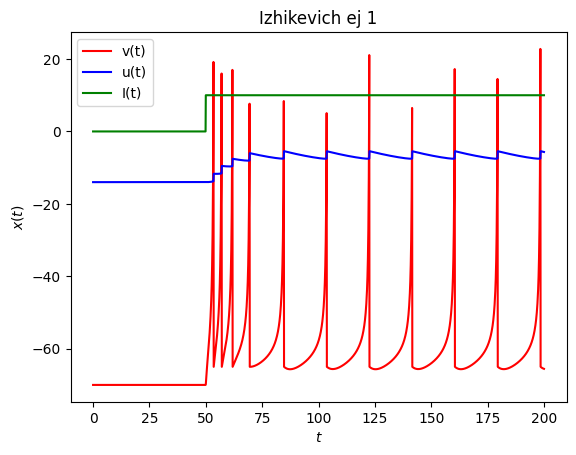

In [4]:
# 2.1)
def I(t):
    return 0 if t < 50 else 10

def f(x,t,p):
    g0 = p[0]
    g1 = p[1]
    g2 = p[2]
    b = p[3]
    c = p[4]
    v = x[0]
    u = x[1]
    return np.array([
                    g2 * (v **2) + g1 * v + g0 - u + I(t),
                    b * (c * v - u)
                    ])

def pot_reset(x,t,p):
    v = x[0]
    u = x[1]
    v_mns = p[5]
    v_pls = p[6]
    vari_u = p[7]
    if (v >= v_pls):
        return np.array([
                        v_mns,
                        u + vari_u
                        ])
    return x

a=0
b=200
h=0.1
k = int((b-a)/h)#+1
#orden:        g0,g1,g2 ,b    ,c ,v_mns,v_pls,vari_u
p = np.array([140,5,0.04,0.02,0.2,-65,30,2])
c = p[4]
v_inic = -70
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f,xa,a,b,k,p,pot_reset)
# 2.3)
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v(t)",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u(t)",linestyle='-',c='blue')
plt.plot(t,[I(ti) for ti in t],label = "I(t)",linestyle='-',c='green')
plt.title('Izhikevich ej 1')
plt.legend()

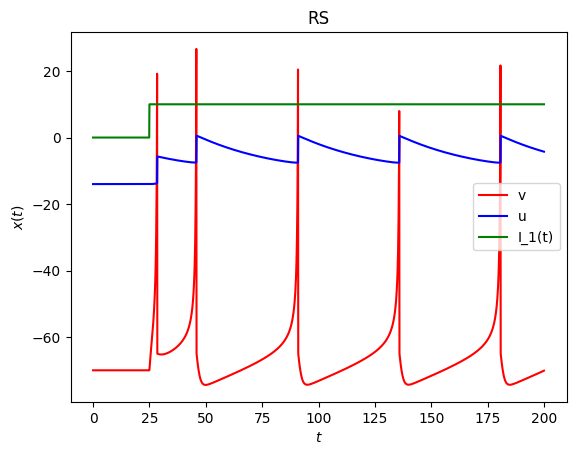

In [5]:
# 2.3)
def I_1(t):
    return 0 if t < 25 else 10

def f_i1(x,t,p):
    g0 = p[0]
    g1 = p[1]
    g2 = p[2]
    b = p[3]
    c = p[4]
    v = x[0]
    u = x[1]
    return np.array([
                    g2 * (v **2) + g1 * v + g0 - u + I_1(t),
                    b * (c * v - u)
                    ])


b = 200
#orden:         g0,g1,g2,b   ,c  ,v_mns,v_pls,vari_u
p = np.array([140,5,0.04,0.02,0.2,-65,30,8])
c = p[4]
v_inic = -70
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f_i1,xa,a,b,k,p,pot_reset)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u",linestyle='-',c='blue')
plt.plot(t,[I_1(ti) for ti in t],label = "I_1(t)",linestyle='-',c='green')
plt.title('RS')
plt.legend()

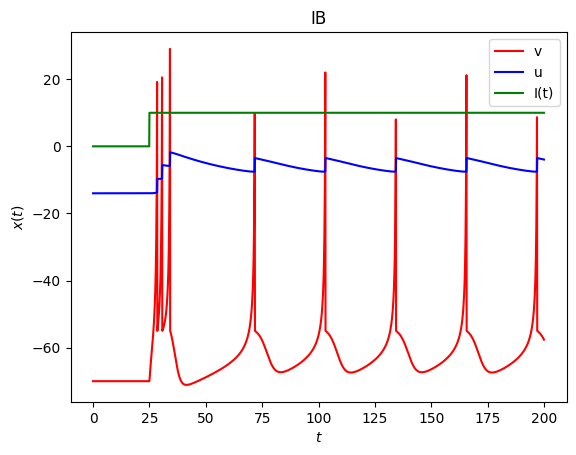

In [6]:
# 2.3)

#orden: g0,g1,g2,b,c,v_mns,v_pls,vari_u
p = np.array([140,5,0.04,0.02,0.2,-55,30,4])
c = p[4]
v_inic = -70
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f_i1,xa,a,b,k,p,pot_reset)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u",linestyle='-',c='blue')
plt.plot(t,[I_1(ti) for ti in t],label = "I(t)",linestyle='-',c='green')
plt.title('IB')
plt.legend()

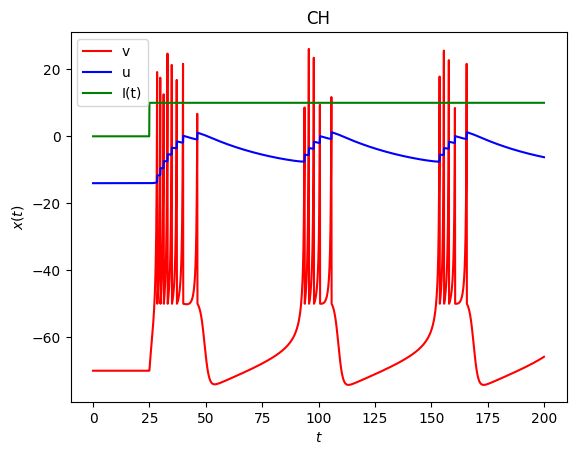

In [7]:
# 2.3)

#orden: g0,g1,g2,b,c,v_mns,v_pls,vari_u
p = np.array([140,5,0.04,0.02,0.2,-50,30,2])
c = p[4]
v_inic = -70
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f_i1,xa,a,b,k,p,pot_reset)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u",linestyle='-',c='blue')
plt.plot(t,[I_1(ti) for ti in t],label = "I(t)",linestyle='-',c='green')
plt.title('CH')
plt.legend()

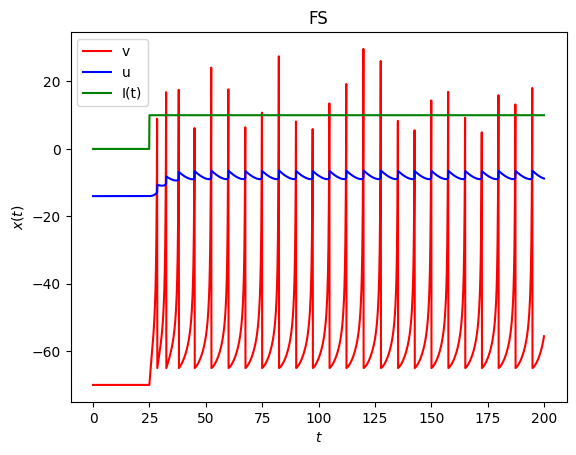

In [8]:
# 2.3)

#orden: g0,g1,g2,b,c,v_mns,v_pls,vari_u
p = np.array([140,5,0.04,0.1,0.2,-65,30,2])
c = p[4]
v_inic = -70
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f_i1,xa,a,b,k,p,pot_reset)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u",linestyle='-',c='blue')
plt.plot(t,[I_1(ti) for ti in t],label = "I(t)",linestyle='-',c='green')
plt.title('FS')
plt.legend()

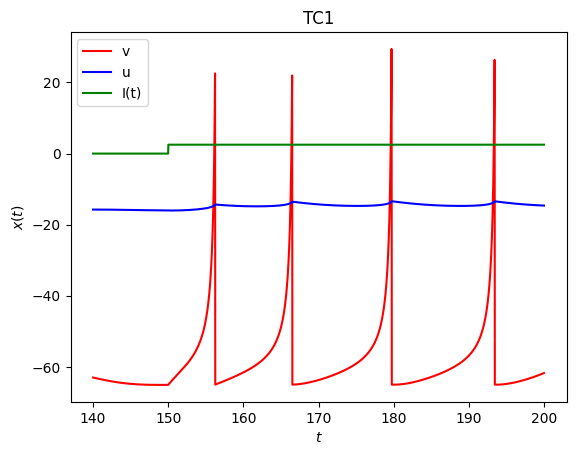

In [9]:
# 2.3)
def I_2(t):
    return 0 if t < 150 else 2.5

def f_i2(x,t,p):
    g0 = p[0]
    g1 = p[1]
    g2 = p[2]
    b = p[3]
    c = p[4]
    v = x[0]
    u = x[1]
    return np.array([
                    g2 * (v **2) + g1 * v + g0 - u + I_2(t),
                    b * (c * v - u)
                    ])


#orden:         g0,g1,g2,b   ,c  ,v_mns,v_pls,vari_u
a = 140
p = np.array([140,5,0.04,0.1,0.25,-65,30,0.05])
c = p[4]
v_inic = -63
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f_i2,xa,a,b,k,p,pot_reset)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u",linestyle='-',c='blue')
plt.plot(t,[I_2(ti) for ti in t],label = "I(t)",linestyle='-',c='green')
plt.title('TC1')
plt.legend()

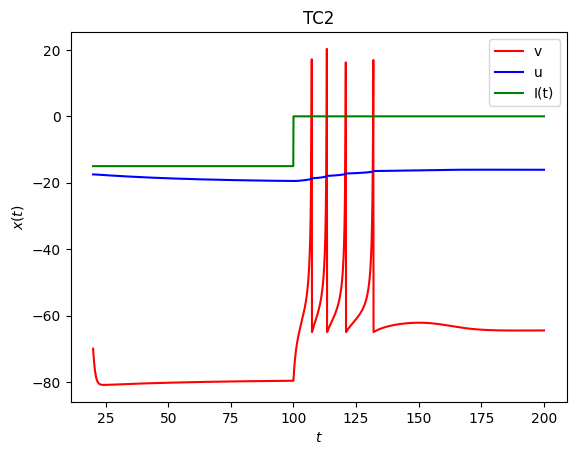

In [10]:
# 2.3)
def I_3(t):
    return -15 if t < 100 else 0

def f_i3(x,t,p):
    g0 = p[0]
    g1 = p[1]
    g2 = p[2]
    b = p[3]
    c = p[4]
    v = x[0]
    u = x[1]
    return np.array([
                    g2 * (v **2) + g1 * v + g0 - u + I_3(t),
                    b * (c * v - u)
                    ])
a=20
#orden:         g0,g1,g2,b   ,c  ,v_mns,v_pls,vari_u
p = np.array([140,5,0.04,0.02,0.25,-65,30,0.05])
c = p[4]
v_inic = -70
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f_i3,xa,a,b,k,p,pot_reset)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u",linestyle='-',c='blue')
plt.plot(t,[I_3(ti) for ti in t],label = "I(t)",linestyle='-',c='green')
plt.title('TC2')
plt.legend()

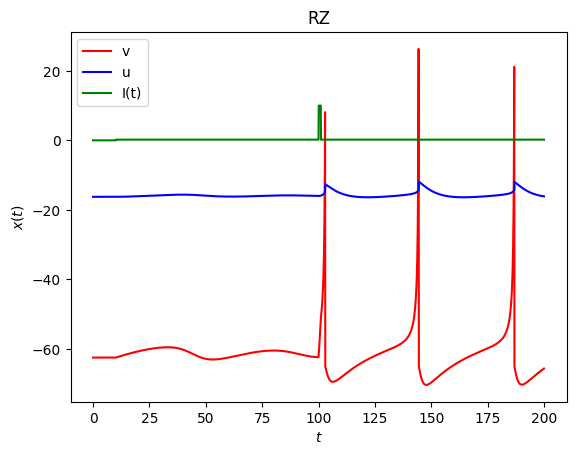

In [11]:
# 2.3)
def I_4(t):
    if t<10:
        return 0
    elif 10<= t <100:
        return 0.2
    elif 100<= t and t<101:
        return 10
    return 0.2

def f_i4(x,t,p):
    g0 = p[0]
    g1 = p[1]
    g2 = p[2]
    b = p[3]
    c = p[4]
    v = x[0]
    u = x[1]
    return np.array([
                    g2 * (v **2) + g1 * v + g0 - u + I_4(t),
                    b * (c * v - u)
                    ])

#orden:         g0,g1,g2,b   ,c  ,v_mns,v_pls,vari_u
a=0
p = np.array([140,5,0.04,0.1,0.26,-65,30,2])
c = p[4]
v_inic = -62.5
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f_i4,xa,a,b,k,p,pot_reset)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u",linestyle='-',c='blue')
plt.plot(t,[I_4(ti) for ti in t],label = "I(t)",linestyle='-',c='green')
plt.title('RZ')
plt.legend()

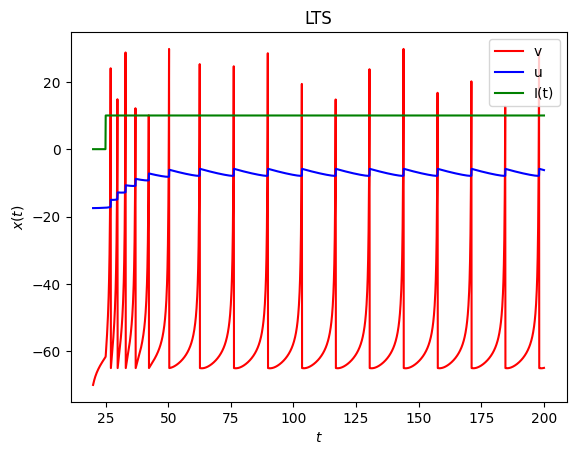

In [12]:
a=20
#orden:         g0,g1,g2,b   ,c  ,v_mns,v_pls,vari_u
p = np.array([140,5,0.04,0.02,0.25,-65,30,2])
c = p[4]
v_inic = -70
xa = np.array([v_inic,c * v_inic])
t,w = integrador_ode(rk4,f_i1,xa,a,b,k,p,pot_reset)

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.plot(t,w[0,:],label="v",linestyle='-',c='red')
plt.plot(t,w[1,:],label="u",linestyle='-',c='blue')
plt.plot(t,[I_1(ti) for ti in t],label = "I(t)",linestyle='-',c='green')
plt.title('LTS')
plt.legend()

## Tareas solicitadas

1. Adaptar código MATLAB del paper a Python.  

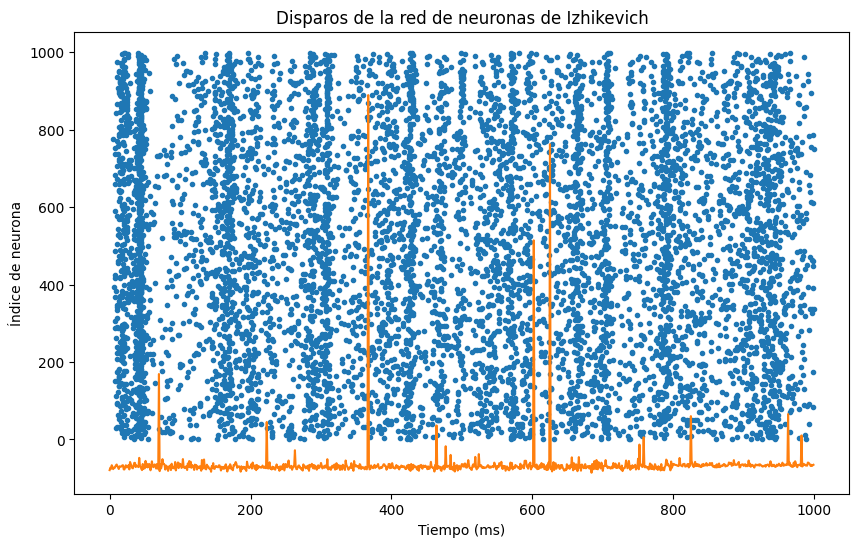

In [1]:
# Simulación de una red de neuronas de Izhikevich
# Código adaptado de https://www.izhikevich.org/publications/spikes.pdf

import numpy as np

import matplotlib.pyplot as plt

# Parámetros de la red
Ne = 800  # neuronas excitatorias
Ni = 200  # neuronas inhibitorias

re = np.random.rand(Ne)
ri = np.random.rand(Ni)

a = np.concatenate([0.02 * np.ones(Ne), 0.02 + 0.08 * ri])
b = np.concatenate([0.2 * np.ones(Ne), 0.25 - 0.05 * ri])
c = np.concatenate([-65 + 15 * re**2, -65 * np.ones(Ni)])
d = np.concatenate([8 - 6 * re**2, 2 * np.ones(Ni)])

S = np.concatenate([0.5 * np.random.rand(Ne + Ni, Ne), -np.random.rand(Ne + Ni, Ni)], axis=1)

v = -65 * np.ones(Ne + Ni)
u = b * v
firings = []

for t in range(1, 1001):  # simulación de 1000 ms
    I = np.concatenate([5 * np.random.randn(Ne), 2 * np.random.randn(Ni)])
    fired = np.where(v >= 30)[0]
    if fired.size > 0:
        firings.extend([(t, i) for i in fired])
        v[fired] = c[fired]
        u[fired] += d[fired]
    I += np.sum(S[:, fired], axis=1) if fired.size > 0 else 0
    v += 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
    v += 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
    u += a * (b * v - u)

firings = np.array(firings)
plt.figure(figsize=(10, 6))
plt.plot(firings[:, 0], firings[:, 1], '.')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Índice de neurona')
plt.plot(v, label='v(t)')
plt.title('Disparos de la red de neuronas de Izhikevich')
plt.show()

2. Reemplazar `Θ(v)` por `z(v)` en el código.  

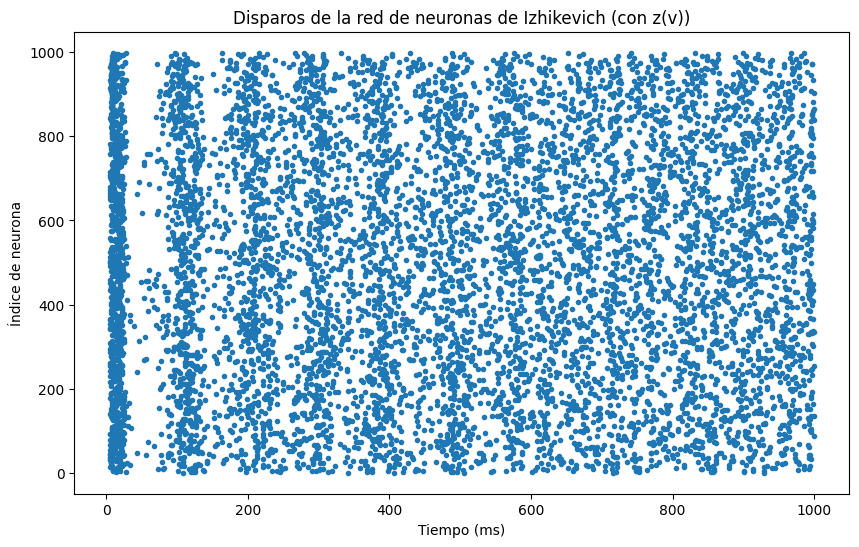

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Parámetros de la red
Ne = 800  # neuronas excitatorias
Ni = 200  # neuronas inhibitorias

re = np.random.rand(Ne)
ri = np.random.rand(Ni)

a = np.concatenate([0.02 * np.ones(Ne), 0.02 + 0.08 * ri])
b = np.concatenate([0.2 * np.ones(Ne), 0.25 - 0.05 * ri])
c = np.concatenate([-65 + 15 * re**2, -65 * np.ones(Ni)])
d = np.concatenate([8 - 6 * re**2, 2 * np.ones(Ni)])

S = np.concatenate([0.5 * np.random.rand(Ne + Ni, Ne), -np.random.rand(Ne + Ni, Ni)], axis=1)

v = -65 * np.ones(Ne + Ni)
u = b * v
firings = []

def z(v):
    return (87 + v) / 450 - 0.0193

for t in range(1, 1001):  # simulación de 1000 ms
    I = np.concatenate([5 * np.random.randn(Ne), 2 * np.random.randn(Ni)])
    fired = np.where(v >= 30)[0]
    if fired.size > 0:
        firings.extend([(t, i) for i in fired])
        v[fired] = c[fired]
        u[fired] += d[fired]
    # Usar z(v) en vez de Heaviside
    I += np.sum(S * z(v), axis=1)
    v += 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
    v += 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
    u += a * (b * v - u)

firings = np.array(firings)
plt.figure(figsize=(10, 6))
plt.plot(firings[:, 0], firings[:, 1], '.')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Índice de neurona')
plt.title('Disparos de la red de neuronas de Izhikevich (con z(v))')
plt.show()

3. Reproducir figura 3 del paper, compartimentando el código en funciones.

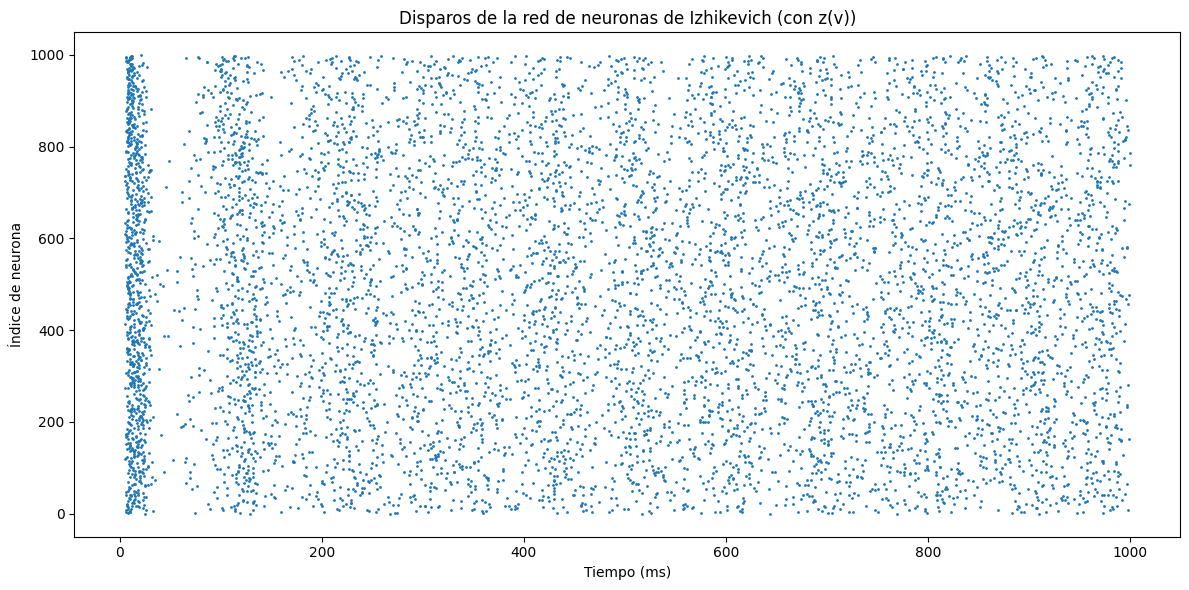

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

def izhikevich_network_simulation(
    Ne=800, Ni=200, T=1000, dt=1.0,
    sigma_e=5, sigma_i=2,
    use_z=False
):
    # Random heterogeneity
    re = np.random.rand(Ne)
    ri = np.random.rand(Ni)

    a = np.concatenate([0.02 * np.ones(Ne), 0.02 + 0.08 * ri])
    b = np.concatenate([0.2 * np.ones(Ne), 0.25 - 0.05 * ri])
    c = np.concatenate([-65 + 15 * re**2, -65 * np.ones(Ni)])
    d = np.concatenate([8 - 6 * re**2, 2 * np.ones(Ni)])

    # Synaptic weights
    S = np.concatenate([
        0.5 * np.random.rand(Ne + Ni, Ne),
        -np.random.rand(Ne + Ni, Ni)
    ], axis=1)

    # Initial conditions
    v = -65 * np.ones(Ne + Ni)
    u = b * v
    firings = []

    def z(v):
        return (87 + v) / 450 - 0.0193

    for t in range(1, int(T/dt)+1):
        # Gaussian noise
        I = np.concatenate([
            sigma_e * np.random.randn(Ne),
            sigma_i * np.random.randn(Ni)
        ])
        fired = np.where(v >= 30)[0]
        if fired.size > 0:
            firings.extend([(t, i) for i in fired])
            v[fired] = c[fired]
            u[fired] += d[fired]
        # Synaptic input
        if use_z:
            I += np.sum(S * z(v), axis=1)
        else:
            I += np.sum(S[:, fired], axis=1) if fired.size > 0 else 0
        # Update v and u (2 steps of dt/2 for better accuracy)
        for _ in range(2):
            v += 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
        u += a * (b * v - u)
    return np.array(firings)

# Simulación con función z(v)
firings_z = izhikevich_network_simulation(use_z=True)

plt.figure(figsize=(12, 6))
plt.plot(firings_z[:, 0], firings_z[:, 1], '.', markersize=2)
plt.xlabel('Tiempo (ms)')
plt.ylabel('Índice de neurona')
plt.title('Disparos de la red de neuronas de Izhikevich (con z(v))')
plt.tight_layout()
plt.show()